<a href="https://colab.research.google.com/github/maxchang88/wrangling/blob/main/Scraping_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://charlottesville.craigslist.org/search/charlottesville-va/hva?lat=38.0345&lon=-78.4865&purveyor=owner&search_distance=60#search=1~gallery~0~0' # The page we want to scrape
raw = requests.get(url,headers=header)

In [3]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

import re # Regular expressions

brands = ['kenworth', 'volvo', 'komatsu', 'caterpillar', 'kobelco', 'sany', 'hitachi', 'bobcat', 'john deere']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    # Check if location element exists before trying to get text
    location_element = listings[k].find('div',class_='location')
    if location_element:
        location = location_element.get_text()
    else:
        location = 'Unknown'  # If no location listed replace with 'Unknown'
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    # Append data to dictionary
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand, 'location':location})

In [16]:
# Converting to dataframe
df = pd.DataFrame.from_dict(data)

# Data Wrangling
df['location'] = df['location'].str.replace('\n', '').str.strip().str.lower()
corrections = {
    "lynchburh": "lynchburg",
    "fredericksburg, va": "fredericksburg",
    "cumberland, virginia": "cumberland",
    "cumberland": "cumberland",
    "n. va": "northern virginia",
    "northern virginia": "northern virginia",
    "staunton va.": "staunton",
    "richmond-": "richmond",
    "richmond, va": "richmond"
}
df['location'] = df['location'].replace(corrections)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')

count        88.000000
mean      24521.431818
std       40185.560315
min           1.000000
25%         983.750000
50%        7399.500000
75%       27750.000000
max      225000.000000
Name: price, dtype: float64


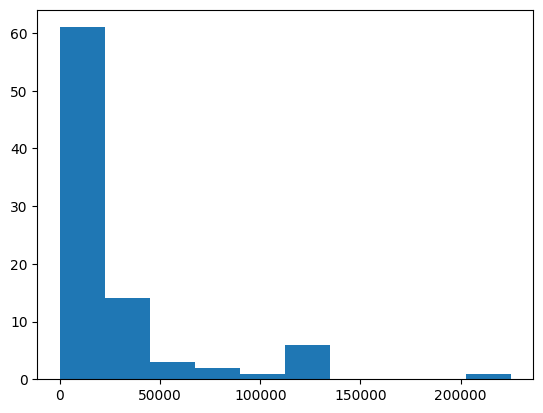

In [5]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

<Axes: title={'center': 'price'}, xlabel='brand'>

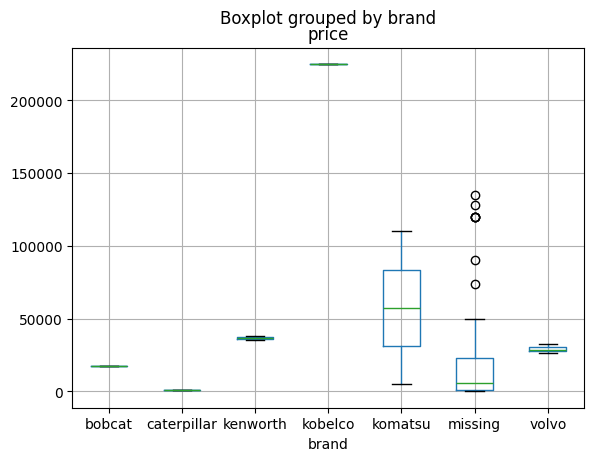

In [22]:
df.boxplot(column='price', by='brand')

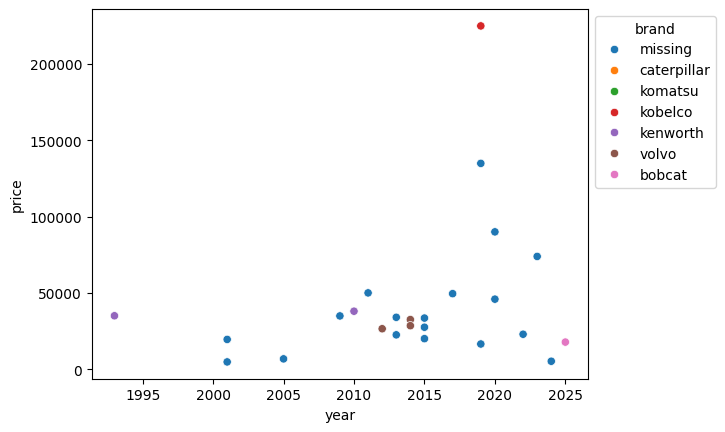

In [8]:
ax = sns.scatterplot(data=df, x='year', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [21]:
df2 = df.loc[:, ['price', 'location']].groupby('location').describe()
df2.sort_values(by=('price', 'count'), ascending=False)

price                                          \
                           count           mean            std       min   
location                                                                   
unknown                     14.0   48173.500000   52507.272368     380.0   
fredericksburg              11.0    2718.454545    3708.862935       8.0   
charlottesville              6.0    5141.666667    6413.767743      50.0   
mt crawford                  5.0   32900.000000    9555.103348   26500.0   
staunton                     4.0   63450.000000   48195.470050   34000.0   
lynchburg                    4.0    6887.500000    8916.312298    1250.0   
ruckersville                 3.0  117583.333333  103832.898608   17750.0   
orange va                    3.0   16000.000000       0.000000   16000.0   
lexington                    3.0    2733.333333    2250.185178     200.0   
midland va, near warrenton   2.0   23000.000000    9899.494937   16000.0   
northern virginia            2.0    8500.000000   10606.601718    1000.0   
richmond                     2.0   14650.000000    9687.362902    7800.0   
cumberland                   2.0     950.000000       0.000000     950.0   
amelie                       2.0   20750.000000    8131.727984   15000.0   
madison                      2.0      45.000000       7.071068      40.0   
nottoway court house         1.0     600.000000            NaN     600.0   
amelia court house           1.0     125.000000            NaN     125.0   
otp south                    1.0  120000.000000            NaN  120000.0   
mount sidney                 1.0     250.000000            NaN     250.0   
raphine va                   1.0   35000.000000            NaN   35000.0   
ruther glen                  1.0   19500.000000            NaN   19500.0   
stuarts draft, va            1.0   38000.000000            NaN   38000.0   
pratts                       1.0     150.000000            NaN     150.0   
madison heights              1.0     400.000000            NaN     400.0   
midlothian                   1.0      90.000000            NaN      90.0   
manakin sabot                1.0   22500.000000            NaN   22500.0   
luray                        1.0       3.000000            NaN       3.0   
harrisonburg va              1.0   33500.000000            NaN   33500.0   
glen allen                   1.0    5000.000000            NaN    5000.0   
farmville                    1.0   16500.000000            NaN   16500.0   
earlysville                  1.0   30000.000000            NaN   30000.0   
culpeper                     1.0    2750.000000            NaN    2750.0   
broadway                     1.0     995.000000            NaN     995.0   
boston                       1.0       1.000000            NaN       1.0   
ashland                      1.0    9000.000000            NaN    9000.0   
arrington                    1.0    6750.000000            NaN    6750.0   
amherst                      1.0   90000.000000            NaN   90000.0   
warrenton                    1.0    1000.000000            NaN    1000.0   

                                                                    
                                 25%       50%       75%       max  
location                                                            
unknown                       4787.5   23200.0  108475.0  128000.0  
fredericksburg                 600.0    1150.0    3000.0   12345.0  
charlottesville                200.0    2850.0    8050.0   16000.0  
mt crawford                  27500.0   28500.0   32500.0   49500.0  
staunton                     34675.0   42450.0   71225.0  134900.0  
lynchburg                     1287.5    3150.0    8750.0   20000.0  
ruckersville                 63875.0  110000.0  167500.0  225000.0  
orange va                    16000.0   16000.0   16000.0   16000.0  
lexington                     1850.0    3500.0    4000.0    4500.0  
midland va, near warrenton   19500.0   23000.0   26500.0   30000.0  
northern virg

In [23]:
df3 = df.loc[:, ['price', 'brand']].groupby('brand').describe()
df3.sort_values(by=('price', 'count'), ascending=False)

price                                                             \
            count           mean           std       min       25%       50%   
brand                                                                          
missing      78.0   21010.717949  34315.264180       1.0     950.0    5850.0   
volvo         3.0   29166.666667   3055.050463   26500.0   27500.0   28500.0   
kenworth      2.0   36500.000000   2121.320344   35000.0   35750.0   36500.0   
komatsu       2.0   57500.000000  74246.212025    5000.0   31250.0   57500.0   
bobcat        1.0   17750.000000           NaN   17750.0   17750.0   17750.0   
caterpillar   1.0     800.000000           NaN     800.0     800.0     800.0   
kobelco       1.0  225000.000000           NaN  225000.0  225000.0  225000.0   

                                 
                  75%       max  
brand                            
missing       22800.0  134900.0  
volvo         30500.0   32500.0  
kenworth      37250.0   38000.0  
komatsu       83750.0  110000.0  
bobcat        17750.0   17750.0  
caterpillar     800.0     800.0  
kobelco      225000.0  225000.0